# Pyber Ride Sharing
### Analysis
1. It looks like the urban area has dominated the ride sharing market as it occupies nearly 70% of the whole market according to the three pie charts.
2. The market in rural area has the potential to be expanded if more drivers could join in the party.
3. According to pie charts1,2 and 3 in all, rural area has much less drivers than the other two types of cities, which leads to the less total rides and therefore less ride fares.

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
#import raw data 1
csv_path_1 = "Pyber/Raw data/city_data copy.csv"
city_data_df = pd.read_csv(csv_path_1)
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [135]:
#import raw data 2
csv_path_2 = "Pyber/Raw data/ride_data copy.csv"
ride_data_df = pd.read_csv(csv_path_2)
ride_data_df.head()




,city,date,fare,ride_id
0,Sarabury,2016/01/16 13:49:00,38.35,5400000000000
1,South Roy,2016/01/02 18:42:00,17.49,4040000000000
2,Wiseborough,2016/01/21 17:35:00,44.18,3650000000000
3,Spencertown,2016/07/31 14:53:00,6.87,2240000000000
4,Nguyenbury,2016/07/09 04:42:00,6.28,1540000000000


In [136]:
#merge two tables with city name
merge_table_df= pd.merge(city_data_df,ride_data_df, on="city")

merge_table_df.head()




,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016/08/19 04:27:00,5.51,6250000000000
1,Kelseyland,63,Urban,2016/04/17 06:59:00,5.54,7470000000000
2,Kelseyland,63,Urban,2016/05/04 15:06:00,30.54,2140000000000
3,Kelseyland,63,Urban,2016/01/25 20:44:00,12.08,1900000000000
4,Kelseyland,63,Urban,2016/08/09 18:19:00,17.91,8780000000000


### Bubble Plot of Ride Sharing Data

In [137]:
# Group the cities by city type and count the ride_count by each city, 
# average the fare by each city and average the dirvers by each city

urban_cities=merge_table_df[merge_table_df["type"]=="Urban"]
suburban_cities=merge_table_df[merge_table_df["type"]=="Suburban"]
rural_cities=merge_table_df[merge_table_df["type"]=="Rural"]


In [138]:
urban_ride_count=urban_cities.groupby('city')["ride_id"].count()
urban_fare_avg=urban_cities.groupby('city')["fare"].mean()
urban_driver_count=urban_cities.groupby('city')["driver_count"].mean()

suburban_ride_count=suburban_cities.groupby('city')["ride_id"].count()
suburban_fare_avg=suburban_cities.groupby('city')["fare"].mean()
suburban_driver_count=suburban_cities.groupby('city')["driver_count"].mean()

rural_ride_count=rural_cities.groupby('city')["ride_id"].count()
rural_fare_avg=rural_cities.groupby('city')["fare"].mean()
rural_driver_count=rural_cities.groupby('city')["driver_count"].mean()

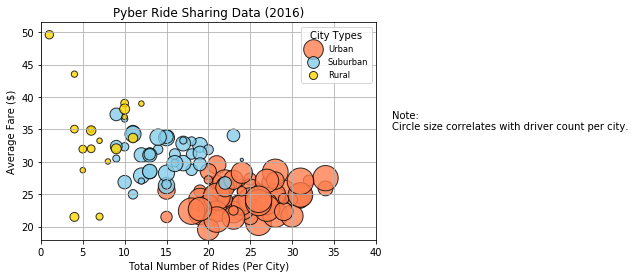

In [139]:
#Build the scatter plots for each city type

plt.scatter(urban_ride_count, 
            urban_fare_avg, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_fare_avg, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_fare_avg, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

#Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,40))

plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._label = "hi"
# lgnd.legendHandles[1]._sizes = [30]
# lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Show plot
plt.show()

### Total Fares by City Type

In [140]:
#Group by city type and then sum up the fares by each city type
city_type=merge_table_df.groupby('type')

total_fare_type=city_type["fare"].sum()

total_fare_type



type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

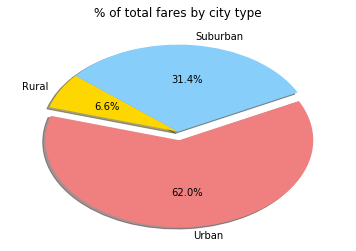

In [141]:
labels = ["Rural", "Urban", "Suburban"]

# The values of each section of the pie chart
sizes = [4255.09, 40078.34, 20335.69]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0.1,0)

plt.pie(sizes,labels=labels, colors=colors,explode=explode ,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of total fares by city type')
plt.show()

### Total Rides by City Type

In [142]:
#Group by city type and then count the total ride by each city type
city_type=merge_table_df.groupby("type")

total_ride_type=city_type["ride_id"].count()

total_ride_type



type
Rural        125
Suburban     657
Urban       1625
Name: ride_id, dtype: int64

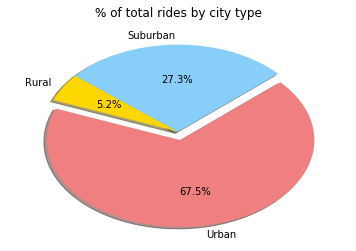

In [143]:
labels = ["Rural", "Urban", "Suburban"]

# The values of each section of the pie chart
sizes = [125, 1625, 657]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0.1,0)

plt.pie(sizes,labels=labels, colors=colors,explode=explode ,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of total rides by city type')
plt.show()

### Total Drivers by City Type

In [144]:
#Calculate the percentage 

drivers_percent = 100*city_data_df.groupby('type').sum()["driver_count"]/city_data_df["driver_count"].sum()



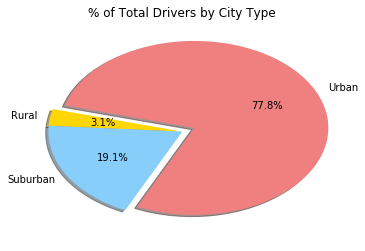

In [145]:
plt.pie(drivers_percent, labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")


plt.show()